In [1]:
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("cardio_train.csv", delimiter = ";")

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [4]:
df.shape

(69301, 13)

In [5]:
print(df.describe())

                 id           age        gender        height        weight  \
count  69301.000000  69301.000000  69301.000000  69301.000000  69301.000000   
mean   50471.480397  19468.786280      1.349519    164.362217     74.203027   
std    28563.100347   2467.261818      0.476821      8.205337     14.383469   
min      988.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25745.000000  17664.000000      1.000000    159.000000     65.000000   
50%    50494.000000  19704.000000      1.000000    165.000000     72.000000   
75%    75150.000000  21326.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  69301.000000  69301.000000  69301.000000  69301.000000  69301.000000   
mean     128.829584     96.650092      1.366806      1.226447      0.088051   
std      154.775805    189.096240      0.680270    

In [6]:
print(df.groupby('cardio').size())

cardio
0    34679
1    34622
dtype: int64


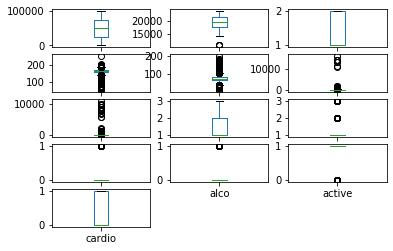

In [7]:
# box and whisker plots
df.plot(kind='box', subplots=True, layout=(5,3), sharex=False, sharey=False)
pyplot.show()

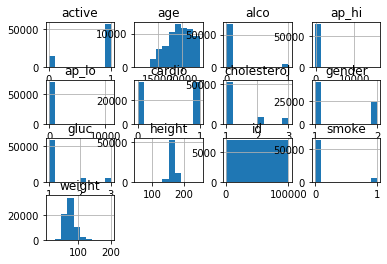

In [8]:
df.hist()
pyplot.show()

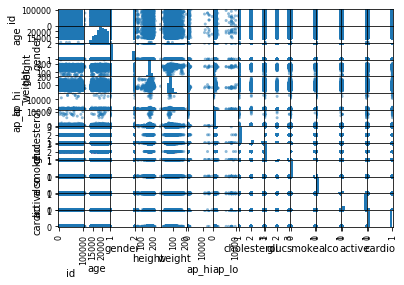

In [9]:
# scatter plot matrix

scatter_matrix(df)
pyplot.show()

In [10]:
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)

In [11]:
X.shape

(69301, 12)

In [12]:
Y.shape

(69301,)

In [13]:
X

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,988,22469,1,155,69.0,130,80,2,2,0,0,1
1,989,14648,1,163,71.0,110,70,1,1,0,0,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1
3,991,14549,2,165,85.0,120,80,1,1,1,1,1
4,992,23393,1,155,62.0,120,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0


In [14]:
Y

0        0
1        1
2        0
3        0
4        0
        ..
69296    0
69297    1
69298    1
69299    1
69300    0
Name: cardio, Length: 69301, dtype: int64

In [15]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.705934 (0.007153)
LDA: 0.646916 (0.003884)
KNN: 0.556403 (0.006365)
CART: 0.631494 (0.004759)
NB: 0.558333 (0.011991)
SVM: 0.500162 (0.000220)


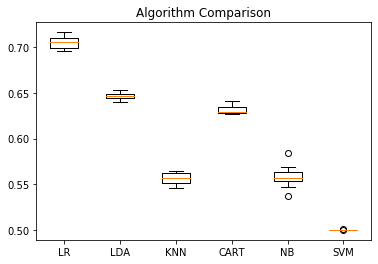

In [16]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [17]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [18]:

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7065146814804126
[[5148 1800]
 [2268 4645]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.72      6948
           1       0.72      0.67      0.70      6913

    accuracy                           0.71     13861
   macro avg       0.71      0.71      0.71     13861
weighted avg       0.71      0.71      0.71     13861



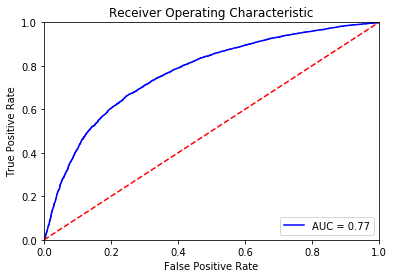

In [21]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_validation)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_validation, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [22]:
from sklearn.externals import joblib
joblib.dump(model,'Cardio_disease_detection.pkl')

C:\Users\Amitesh.Patel\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['Cardio_disease_detection.pkl']